In [20]:
import matplotlib.pyplot as plt
from langdetect import detect
import pandas as pd
import numpy as np

In [21]:
# read values feom excel database
xlsx_path = 'tweets_database_1500.xlsx'
data = pd.read_excel(xlsx_path)

Assignment section 2

#quitsmoking    654
#stopsmoking    489
#smokefree      228
Name: HASHTAG, dtype: int64


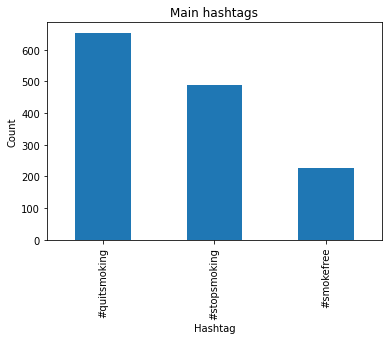

In [22]:
# plot individual hashtags and their counts
data.HASHTAG.value_counts().plot.bar()
print(data.HASHTAG.value_counts())
# naming
plt.title("Main hashtags")
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.show()

HASHTAG
#quitsmoking    315
#smokefree       88
#stopsmoking    197
Name: AUTHOR ID, dtype: int64


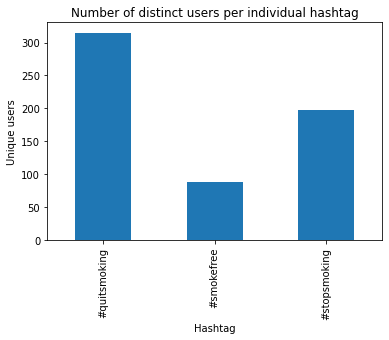

In [23]:
# plot individual users per individual hashtags
data.groupby('HASHTAG')['AUTHOR ID'].nunique().plot.bar()
print(data.groupby('HASHTAG')['AUTHOR ID'].nunique())
# naming
plt.title("Number of distinct users per individual hashtag")
plt.xlabel("Hashtag")
plt.ylabel("Unique users")
plt.show()

Assignment section 3

Location available from  25  tweets.
Location unavailable from  1346  tweets.


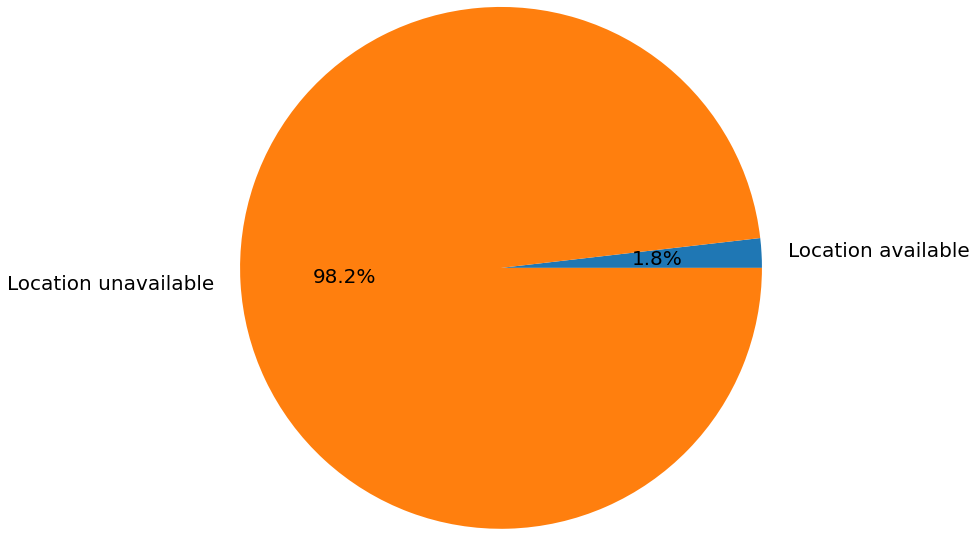

In [24]:
# percentage of tweets with location available
available_and_hidden_counts = [data.LOCATION.count(), data.LOCATION.isna().sum()]
print("Location available from ", data.LOCATION.count(), " tweets.")
print("Location unavailable from ", data.LOCATION.isna().sum(), " tweets.")
titles = ["Location available", "Location unavailable"]
plt.pie(available_and_hidden_counts, labels = titles, autopct='%1.1f%%', radius=3, textprops={"fontsize":20})
plt.show()

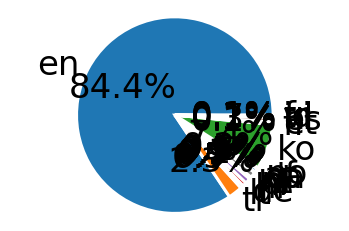

In [27]:

# identify languages
languages = {}
total = len(data.TEXT.values)
for text in data.TEXT.values:
    # iterate through all tweets and recognize the used language
    recognized = detect(text)
    if recognized in languages:
        languages[recognized] += 1 # increment
    else:
        languages[recognized] = 1 # add new
# visualize
#ax1.pie(list(languages.values()), labels = list(languages.keys()), autopct='%1.1f%%', radius=4, textprops={"fontsize":34})
#ax1.axis("equal")
#plt.show()


x = np.char.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec'])
y = np.array([234, 64, 54,10, 0, 1, 0, 9, 2, 1, 7, 7])
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(list(languages.values()), startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')